In [1]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from nltk.tokenize import TweetTokenizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
columns = ['tweet_id','timestamp','tweet_text','user_id',
           'tweet_coords','tweet_coords_list','tweet_long','tweet_lat','location',
           'enc_url','tweet_lang','hashtags']

In [3]:
tweet_full = pd.read_csv(r'./tweetCoords.csv',
                         header=None,
                         names=columns,
                         parse_dates=[1],
                         infer_datetime_format=True,
                         index_col='timestamp')

In [4]:
tweet_date = pd.to_datetime("2017-09-11 00:00:00")
date_delta = pd.Timedelta("24HR")

In [5]:
tweet_text = tweet_full.loc[tweet_date:tweet_date + date_delta,"tweet_text"]

regex patterns
urls: `https?:\/\/\S+`

hashtags: `#\S+`

two-letter words: `\b[A-Za-z]{2}\b`

In [6]:
tweet_text = tweet_text.str.replace(r'\b[A-Za-z]{2}\b','').str.replace('https?:\/\/\S+','')

In [7]:
tweet_tokenizer = TweetTokenizer(strip_handles=True,preserve_case=False,reduce_len=True)

In [9]:
tweets_tokens = tweet_text.apply(tweet_tokenizer.tokenize)

In [31]:
vector_model = Word2Vec(tweets_tokens, min_count=25, sg=1, window=4)
word_matrix = vector_model.wv[vector_model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(word_matrix)

In [32]:
word_matrix.shape

(864, 100)

In [33]:
vector_model.wv.most_similar("mph")

[('sse', 0.9560169577598572),
 ('ene', 0.9446160197257996),
 ('ese', 0.9424425959587097),
 ('67.9', 0.9423637390136719),
 ('63.3', 0.9392403960227966),
 ('nne', 0.9364564418792725),
 ('55', 0.9333615303039551),
 ('66.8', 0.9310512542724609),
 ('knots', 0.9269980192184448),
 ('57.5', 0.9230844974517822)]

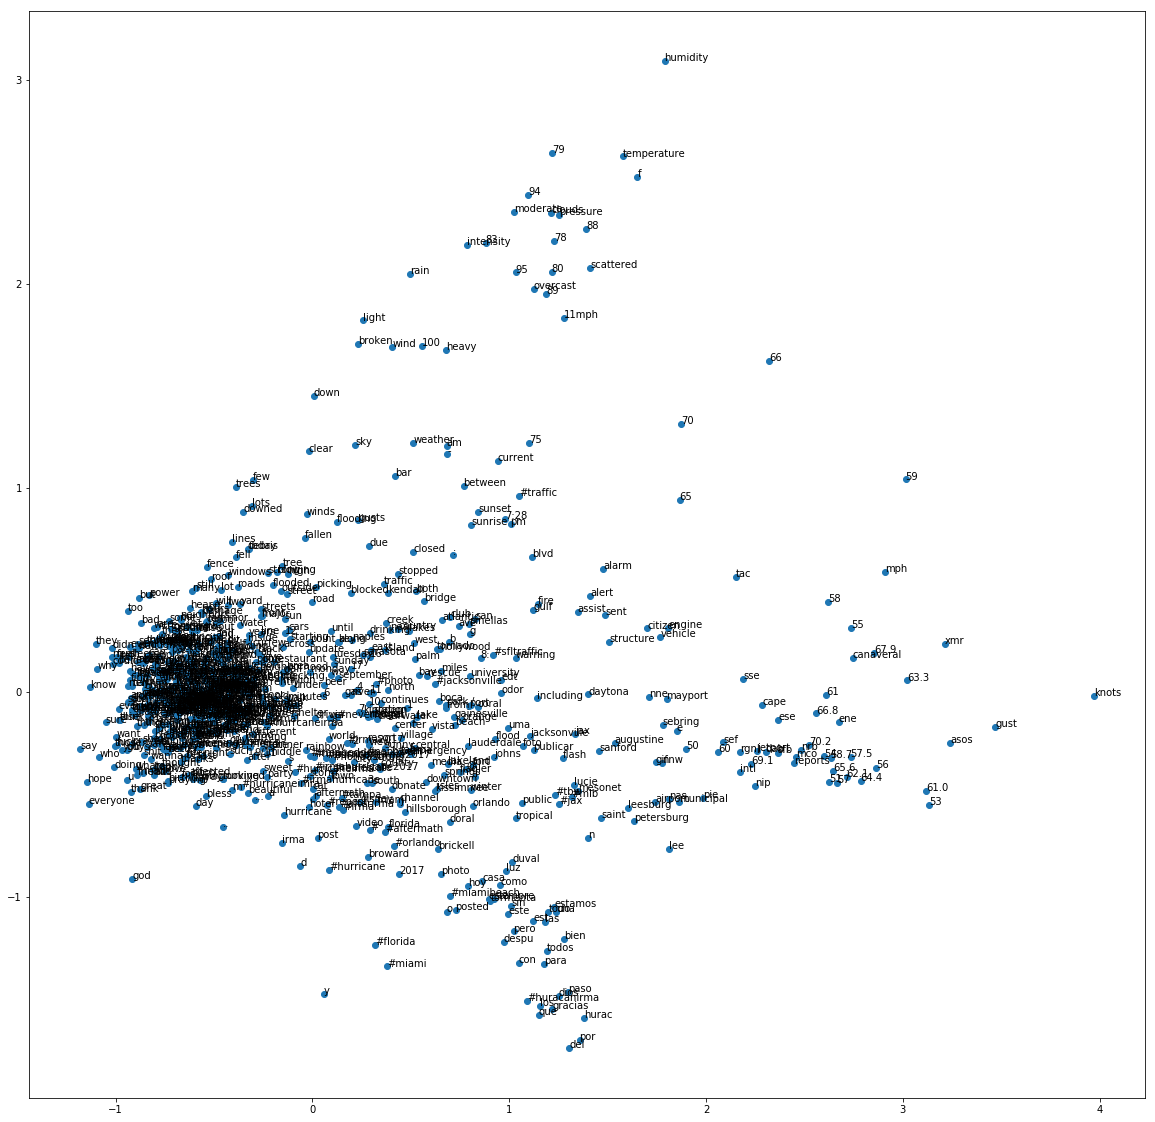

In [34]:
plt.figure(figsize=(20,20))
plt.scatter(result[:, 0], result[:, 1])
words = list(vector_model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [48]:
from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.models import ColumnDataSource
output_notebook()
TOOLS="""hover,crosshair,pan,wheel_zoom,box_zoom,reset,tap,save"""

word_data = ColumnDataSource(
    data=dict(
        word_val = words,
        x_val = result[:,0].tolist(),
        y_val = result[:,1].tolist()
    )
)

TOOLTIPS = [
    ("Word", "@word_val"),
    ("(x,y)","($x, $y)")
]
vector_fig = figure(tools=TOOLS, tooltips=TOOLTIPS)
vector_fig.scatter('x_val','y_val',source=word_data)

show(vector_fig)

Loading BokehJS ...